**Case Study #2**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/casestudy.csv', index_col=0)
df.columns=['customer_email','net_revenue','year']

In [ ]:
customers_2015 = df[df.year==2015]
customers_2016 = df[df.year==2016]
customers_2017 = df[df.year==2017]

In [ ]:
customers_2015_unique = set(customers_2015.customer_email)
customers_2016_unique = set(customers_2016.customer_email)
customers_2017_unique = set(customers_2017.customer_email)

In [ ]:
total_revenue_current_year = customers_2017.net_revenue.sum()
print("Total Revenue for the Current Year: ", total_revenue_current_year)

Total Revenue for the Current Year:  31417495.030000016


In [ ]:
new_customers = customers_2017_unique - customers_2016_unique
new_customers_2017 = customers_2017.loc[customers_2017.customer_email.isin(new_customers)]
print('New Customer Revenue: ', new_customers_2017.net_revenue.sum())

New Customer Revenue:  28776235.039999995


In [ ]:
existing_customers1 = customers_2015_unique & customers_2016_unique 
existing_customers2 = customers_2016_unique & customers_2017_unique
existing_customers_2017 = customers_2017[customers_2017.customer_email.isin(existing_customers2)]
existing_customers_2016 = customers_2016[customers_2016.customer_email.isin(existing_customers1)]
print('Existing Customer Growth: ', existing_customers_2017.net_revenue.sum()-existing_customers_2016.net_revenue.sum())

Existing Customer Growth:  -4844192.59


In [ ]:
loss_2015_2016 = customers_2015_unique - customers_2016_unique
loss_2016_2017 = customers_2016_unique - customers_2017_unique
loss_customers_1 = customers_2015[customers_2015.customer_email.isin(loss_2015_2016)]
loss_customers_2 = customers_2016[customers_2016.customer_email.isin(loss_2016_2017)]
print('Revenue lost from attrition: ', loss_customers_1.net_revenue.sum() + loss_customers_2.net_revenue.sum())

Revenue lost from attrition:  44681927.010000005


In [ ]:
print('Existing Customer Revenue Current Year: ', existing_customers_2017.net_revenue.sum())

Existing Customer Revenue Current Year:  2641259.99


In [ ]:
print('Existing Customer Revenue Prior Year: ', existing_customers_2016.net_revenue.sum())

Existing Customer Revenue Prior Year:  7485452.58


In [ ]:
print('Total Customers Current Year: ', len(customers_2017_unique))

Total Customers Current Year:  249987


In [ ]:
print('Total Customers Previous Year: ', len(customers_2016_unique))

Total Customers Previous Year:  204646


In [310]:
new_customers = customers_2015_unique ^ customers_2016_unique ^ customers_2017_unique
print('New Customers: ', len(new_customers))

New Customers:  535633


In [ ]:
print('Lost Customers: ', len(loss_customers_1)+len(loss_customers_2))

Lost Customers:  355397


In [317]:
new_customers1 = customers_2016_unique - customers_2015_unique
new_customers2 = customers_2017_unique - customers_2016_unique
new_customers_2016 = customers_2016.loc[customers_2016.customer_email.isin(new_customers1)]
new_customers_2017 = customers_2017.loc[customers_2017.customer_email.isin(new_customers2)]

loss_2015_2016 = customers_2015_unique - customers_2016_unique
loss_2016_2017 = customers_2016_unique - customers_2017_unique
loss_customers_1 = customers_2015[customers_2015.customer_email.isin(loss_2015_2016)]
loss_customers_2 = customers_2016[customers_2016.customer_email.isin(loss_2016_2017)]


existing_customers1 = customers_2015_unique & customers_2016_unique 
existing_customers2 = customers_2016_unique & customers_2017_unique
existing_customers_2017 = customers_2017[customers_2017.customer_email.isin(existing_customers2)]
existing_customers_2016 = customers_2016[customers_2016.customer_email.isin(existing_customers1)]


In [318]:
customers = pd.DataFrame({'Year':['2015','2016','2017'],
                          'Total':[len(customers_2015_unique),len(customers_2016_unique),len(customers_2017_unique)],
                          'Revenue':[customers_2015.net_revenue.sum(),customers_2016.net_revenue.sum(),customers_2017.net_revenue.sum()],
                          'Revenue_Loss_from_Attrition':[customers_2015.net_revenue.sum(),loss_customers_1.net_revenue.sum(),loss_customers_2.net_revenue.sum()],
                          'Existing_Customers_Revenue' : [customers_2015.net_revenue.sum(),existing_customers_2016.net_revenue.sum(),existing_customers_2017.net_revenue.sum()],
                          'New_Customer_Revenue':[customers_2015.net_revenue.sum(),new_customers_2016.net_revenue.sum(),new_customers_2017.net_revenue.sum()],
                          'Existing_Customers': [len(customers_2015_unique),len(existing_customers1),len(existing_customers2)],
                          'New_Customers':[len(customers_2015_unique),len(new_customers1),len(new_customers2)],
                          'Lost_Customers':[len(customers_2015_unique),len(loss_2015_2016),len(loss_2016_2017)]})
customers.head()

,Year,Total,Revenue,Revenue_Loss_from_Attrition,Existing_Customers_Revenue,New_Customer_Revenue,Existing_Customers,New_Customers,Lost_Customers
0,2015,231294,29036749.19,29036749.19,29036749.19,29036749.19,231294,231294,231294
1,2016,204646,25730943.59,21571632.07,7485452.58,18245491.01,59584,145062,171710
2,2017,249987,31417495.03,23110294.94,2641259.99,28776235.04,20959,229028,183687


**Plot #1** <br>
*   Existing Customers decreasing over time.
*   Lost customers was more than gained customers in 2016.
*   Gained customers was more than lost customers in 2017.




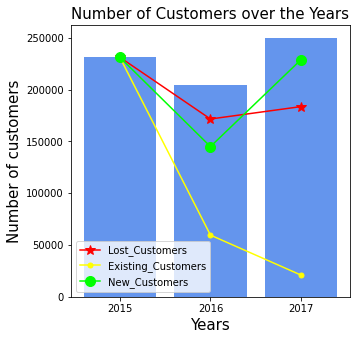

In [319]:
plt.figure(figsize=(5, 5))
plt.bar(customers.Year,customers.Total, color='cornflowerblue')
customers['Lost_Customers'].plot(kind='line', marker='*', color='red', ms=10)
customers['Existing_Customers'].plot(kind='line', marker='.', color='yellow', ms=10)
customers['New_Customers'].plot(kind='line', marker='o', color='lime', ms=10)
plt.ylabel('Number of customers',size=15)
plt.xlabel('Years',size=15)
plt.title('Number of Customers over the Years',size=15)
plt.yticks(size=10)
plt.xticks(size=10)
plt.legend(loc="lower left")
plt.show()

**Plot #2** <br>
 

*   Existing Customers Revenue is decreasing over time.
*   Lost Revenue was more than gained customers in 2016.
*   Gained Revenue was more than lost customers in 2017.







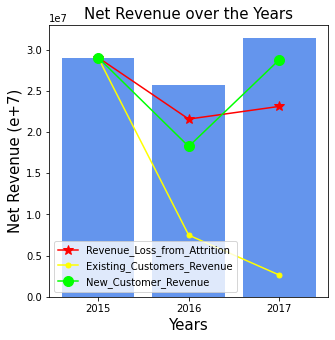

In [323]:
plt.figure(figsize=(5, 5))
plt.bar(customers.Year,customers.Revenue,color='cornflowerblue')
customers['Revenue_Loss_from_Attrition'].plot(kind='line', marker='*', color='red', ms=10)
customers['Existing_Customers_Revenue'].plot(kind='line', marker='.', color='yellow', ms=10)
customers['New_Customer_Revenue'].plot(kind='line', marker='o', color='lime', ms=10)
plt.ylabel('Net Revenue (e+7)',size=15)
plt.xlabel('Years',size=15)
plt.title('Net Revenue over the Years',size=15)
plt.legend(loc="lower left")
plt.yticks(size=10)
plt.xticks(size=10)
plt.show()